<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project1</h3>
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

## Load and Prepare Data

In [98]:
vacc_df = pd.read_csv("country_vaccinations.csv")
manuf_df = pd.read_csv("country_vaccinations_by_manufacturer.csv")

## EDA

In [99]:
vacc_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [100]:
vacc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

In [101]:
vacc_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.745100e+04,1.655400e+04,1.379500e+04,1.442100e+04,3.094800e+04,17451.000000,16554.000000,13795.000000,30948.000000
mean,1.200444e+07,5.704551e+06,3.293973e+06,2.273661e+05,1.149718e+05,29.283554,19.181574,12.340698,3426.365969
std,6.622349e+07,2.101612e+07,1.234425e+07,1.258556e+06,8.460548e+05,35.042304,20.734193,15.857682,4572.377684
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.262015e+05,9.999100e+04,4.832450e+04,4.324000e+03,8.520000e+02,2.970000,2.580000,1.320000,412.000000
50%,8.890780e+05,6.450395e+05,3.632100e+05,2.133600e+04,6.471000e+03,14.510000,10.730000,5.560000,1851.000000
75%,4.213660e+06,2.809300e+06,1.635366e+06,9.441700e+04,3.545425e+04,44.460000,30.890000,17.610000,5123.000000
max,1.426347e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.350000,116.660000,115.690000,118759.000000


## Data Preprocessing

In [102]:
countries = ["Germany", "France", "Italy"]
country_data = vacc_df[vacc_df['country'].isin(countries)].copy()

In [103]:
country_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
9675,France,FRA,2020-12-27,22.0,22.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Public Health France,https://www.data.gouv.fr/fr/datasets/donnees-r...
9676,France,FRA,2020-12-28,104.0,104.0,NaN,82.0,82.0,0.0,0.0,NaN,1.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Public Health France,https://www.data.gouv.fr/fr/datasets/donnees-r...
9677,France,FRA,2020-12-29,213.0,213.0,NaN,109.0,96.0,0.0,0.0,NaN,1.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Public Health France,https://www.data.gouv.fr/fr/datasets/donnees-r...
9678,France,FRA,2020-12-30,341.0,341.0,NaN,128.0,106.0,0.0,0.0,NaN,2.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Public Health France,https://www.data.gouv.fr/fr/datasets/donnees-r...
9679,France,FRA,2020-12-31,431.0,431.0,NaN,90.0,102.0,0.0,0.0,NaN,2.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Public Health France,https://www.data.gouv.fr/fr/datasets/donnees-r...


In [104]:
country_data = country_data.drop(['iso_code', 'vaccines', 'source_name','source_website'], axis=1)
country_data.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
9675,France,2020-12-27,22.0,22.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
9676,France,2020-12-28,104.0,104.0,NaN,82.0,82.0,0.0,0.0,NaN,1.0
9677,France,2020-12-29,213.0,213.0,NaN,109.0,96.0,0.0,0.0,NaN,1.0
9678,France,2020-12-30,341.0,341.0,NaN,128.0,106.0,0.0,0.0,NaN,2.0
9679,France,2020-12-31,431.0,431.0,NaN,90.0,102.0,0.0,0.0,NaN,2.0


In [105]:
imputer = SimpleImputer(strategy='mean')

In [106]:
country_data.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
9675,France,2020-12-27,22.0,22.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
9676,France,2020-12-28,104.0,104.0,NaN,82.0,82.0,0.0,0.0,NaN,1.0
9677,France,2020-12-29,213.0,213.0,NaN,109.0,96.0,0.0,0.0,NaN,1.0
9678,France,2020-12-30,341.0,341.0,NaN,128.0,106.0,0.0,0.0,NaN,2.0
9679,France,2020-12-31,431.0,431.0,NaN,90.0,102.0,0.0,0.0,NaN,2.0


In [107]:
country_data[['total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'daily_vaccinations_raw',
       'daily_vaccinations', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'daily_vaccinations_per_million']] = imputer.fit_transform(country_data[['total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'daily_vaccinations_raw',
       'daily_vaccinations', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'daily_vaccinations_per_million']])

In [108]:
country_data.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
9675,France,2020-12-27,22.0,22.0,7.797528e+06,346864.528333,337842.55,0.0,0.0,11.015617,4772.875
9676,France,2020-12-28,104.0,104.0,7.797528e+06,82.000000,82.00,0.0,0.0,11.015617,1.000
9677,France,2020-12-29,213.0,213.0,7.797528e+06,109.000000,96.00,0.0,0.0,11.015617,1.000
9678,France,2020-12-30,341.0,341.0,7.797528e+06,128.000000,106.00,0.0,0.0,11.015617,2.000
9679,France,2020-12-31,431.0,431.0,7.797528e+06,90.000000,102.00,0.0,0.0,11.015617,2.000


In [109]:
country_data['date'] = pd.to_datetime(country_data['date'])
country_data['date_ordinal'] = country_data['date'].apply(lambda x: x.toordinal())

In [110]:
# Create dummy columns manually for selected countries
country_data['country_Germany'] = (country_data['country'] == 'Germany').astype(int)
country_data['country_France'] = (country_data['country'] == 'France').astype(int)
country_data['country_Italy'] = (country_data['country'] == 'Italy').astype(int)

# Optionally drop the original 'country' column if no longer needed
# country_data.drop('country', axis=1, inplace=True)


In [111]:
country_data.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,date_ordinal,country_Germany,country_France,country_Italy
9675,France,2020-12-27,22.0,22.0,7.797528e+06,346864.528333,337842.55,0.0,0.0,11.015617,4772.875,737786,0,1,0
9676,France,2020-12-28,104.0,104.0,7.797528e+06,82.000000,82.00,0.0,0.0,11.015617,1.000,737787,0,1,0
9677,France,2020-12-29,213.0,213.0,7.797528e+06,109.000000,96.00,0.0,0.0,11.015617,1.000,737788,0,1,0
9678,France,2020-12-30,341.0,341.0,7.797528e+06,128.000000,106.00,0.0,0.0,11.015617,2.000,737789,0,1,0
9679,France,2020-12-31,431.0,431.0,7.797528e+06,90.000000,102.00,0.0,0.0,11.015617,2.000,737790,0,1,0


In [112]:
country_data.columns

Index(['country', 'date', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'daily_vaccinations_raw',
       'daily_vaccinations', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'daily_vaccinations_per_million', 'date_ordinal', 'country_Germany',
       'country_France', 'country_Italy'],
      dtype='object')

In [113]:
order = [
    'country', 'date', 'date_ordinal','people_vaccinated','people_fully_vaccinated', 'daily_vaccinations_raw','daily_vaccinations', 'total_vaccinations_per_hundred','people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred','daily_vaccinations_per_million', 'country_Germany','country_France', 'country_Italy','total_vaccinations'
    ]
country_data = country_data[order]

In [114]:
country_data

,country,date,date_ordinal,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,country_Germany,country_France,country_Italy,total_vaccinations
9675,France,2020-12-27,737786,22.0,7.797528e+06,346864.528333,337842.55,0.00,0.00,11.015617,4772.875,0,1,0,22.0
9676,France,2020-12-28,737787,104.0,7.797528e+06,82.000000,82.00,0.00,0.00,11.015617,1.000,0,1,0,104.0
9677,France,2020-12-29,737788,213.0,7.797528e+06,109.000000,96.00,0.00,0.00,11.015617,1.000,0,1,0,213.0
9678,France,2020-12-30,737789,341.0,7.797528e+06,128.000000,106.00,0.00,0.00,11.015617,2.000,0,1,0,341.0
9679,France,2020-12-31,737790,431.0,7.797528e+06,90.000000,102.00,0.00,0.00,11.015617,2.000,0,1,0,431.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14169,Italy,2021-07-11,737982,35881939.0,2.309263e+07,409253.000000,538133.00,95.44,59.35,38.190000,8900.000,0,0,1,57703531.0
14170,Italy,2021-07-12,737983,35971411.0,2.356806e+07,561554.000000,541660.00,96.37,59.49,38.980000,8959.000,0,0,1,58265085.0
14171,Italy,2021-07-13,737984,36059635.0,2.404868e+07,565911.000000,546479.00,97.30,59.64,39.770000,9038.000,0,0,1,58830996.0
14172,Italy,2021-07-14,737985,36155685.0,2.451507e+07,558588.000000,548324.00,98.23,59.80,40.550000,9069.000,0,0,1,59389584.0


In [115]:
X = country_data.iloc[:, 2: -1].values
y = country_data.iloc[:, -1].values

In [116]:
print(X[:5])

[[7.37786000e+05 2.20000000e+01 7.79752807e+06 3.46864528e+05
  3.37842550e+05 0.00000000e+00 0.00000000e+00 1.10156174e+01
  4.77287500e+03 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [7.37787000e+05 1.04000000e+02 7.79752807e+06 8.20000000e+01
  8.20000000e+01 0.00000000e+00 0.00000000e+00 1.10156174e+01
  1.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [7.37788000e+05 2.13000000e+02 7.79752807e+06 1.09000000e+02
  9.60000000e+01 0.00000000e+00 0.00000000e+00 1.10156174e+01
  1.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [7.37789000e+05 3.41000000e+02 7.79752807e+06 1.28000000e+02
  1.06000000e+02 0.00000000e+00 0.00000000e+00 1.10156174e+01
  2.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [7.37790000e+05 4.31000000e+02 7.79752807e+06 9.00000000e+01
  1.02000000e+02 0.00000000e+00 0.00000000e+00 1.10156174e+01
  2.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]]


In [117]:
print(y[:5])

[ 22. 104. 213. 341. 431.]


## Strorytelling - Visualization

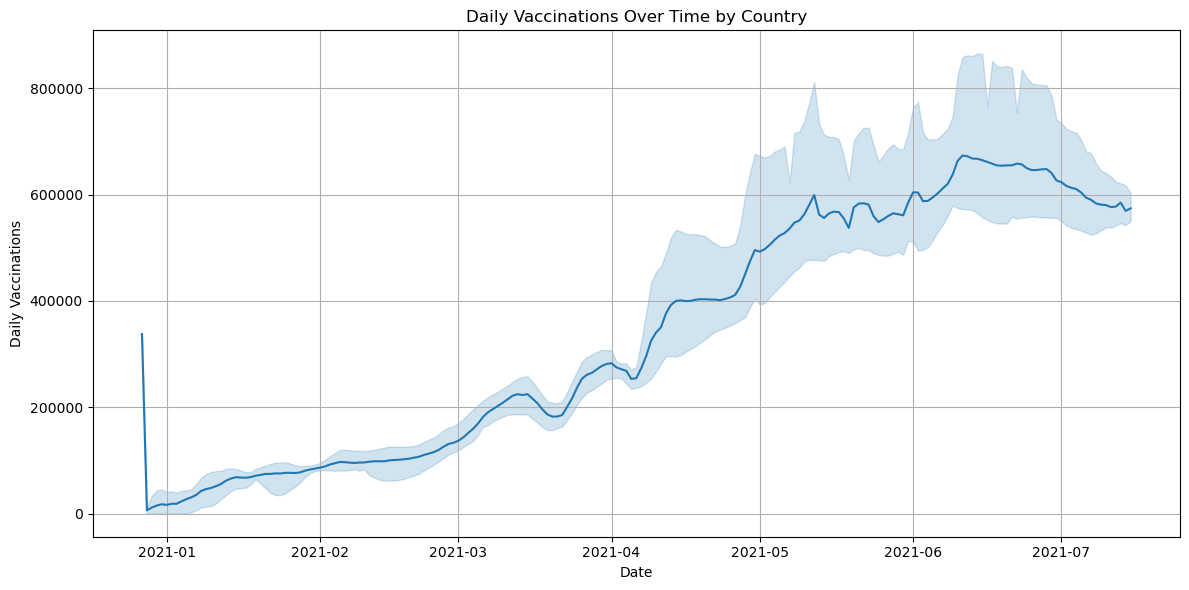

In [118]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=country_data, x='date', y='daily_vaccinations')
plt.title('Daily Vaccinations Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Daily Vaccinations')
plt.grid(True)
plt.tight_layout()
plt.show()

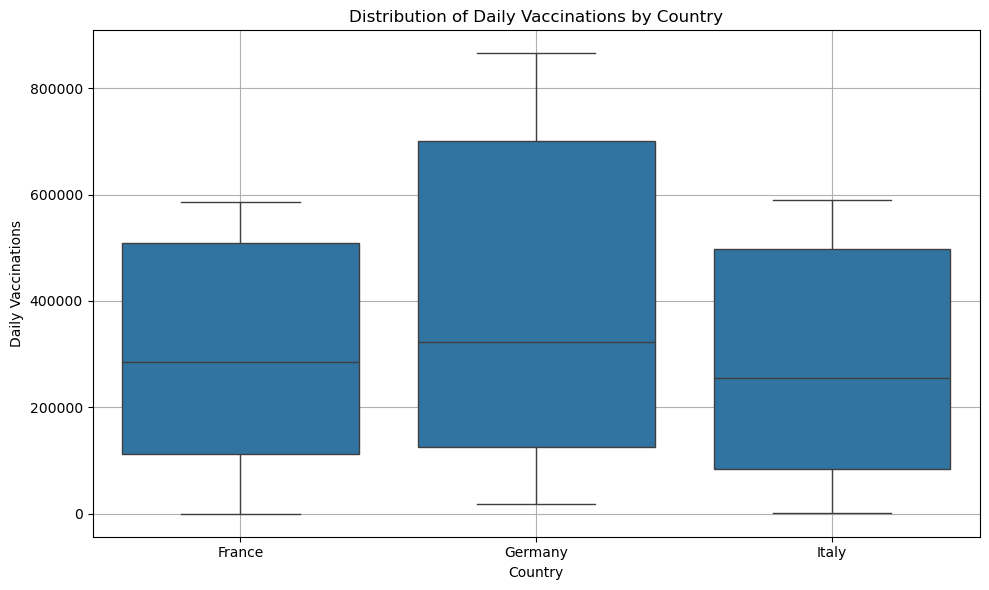

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=country_data, x='country', y='daily_vaccinations')
plt.title('Distribution of Daily Vaccinations by Country')
plt.xlabel('Country')
plt.ylabel('Daily Vaccinations')
plt.grid(True)
plt.tight_layout()
plt.show()

## Prepare Data for Machine learning

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(482, 12)
(482,)
(121, 12)
(121,)


In [121]:
# st_scaling = 

## Train your model

In [122]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Test the model and show the metrics

In [123]:
preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
print(f"MSE: {mse:.2f}, R2: {r2:.2f}")

MSE: 234145673637.06, R2: 1.00


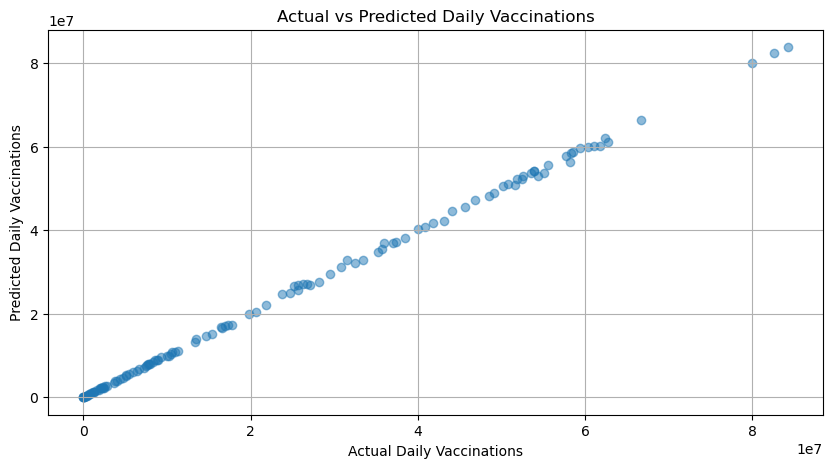

In [124]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, preds, alpha=0.5)
plt.xlabel('Actual Daily Vaccinations')
plt.ylabel('Predicted Daily Vaccinations')
plt.title('Actual vs Predicted Daily Vaccinations')
plt.grid(True)
plt.show()

## Save your final model

## Send us the Result (Maktabkhoone)